# Your name: Kiejstut Bunikiewicz
## Assignment Name: CA03 - Decision Tree Algorithm

# Program Inititialization Section
## Enter your import packages here

In [271]:
# import packages 

import os
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics # this will give us the metrics to use later
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn import svm
import matplotlib.pyplot as plt # this package and the packages after are used for graphing
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from google.colab import drive

#Mounting Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data File Reading Section / Data Source and Contents
## Write code to read in data from external sources here

In [272]:
#read datasets
census_data = '/content/drive/My Drive/MSBA_Colab_2020/ML_Algorithms/CA03/Data/census_data.csv'
param_tune = '/content/drive/My Drive/MSBA_Colab_2020/ML_Algorithms/CA03/Data/automated_parameter_tuning.csv'
census_data = pd.read_csv(census_data)
param_tune = pd.read_csv(param_tune)
census_data.head() # import successful

hours_per_week_bin occupation_bin  msr_bin  ...            age_bin   flag  y
0           b. 31-40   b. Mid - Low   b. Mid  ...   d. 36-40 & 56-60  train  0
1            a. 0-30        e. High  c. High  ...           e. 40-55  train  0
2           b. 31-40         a. Low   b. Mid  ...   d. 36-40 & 56-60  train  0
3           b. 31-40         a. Low  c. High  ...           e. 40-55  train  0
4           b. 31-40        e. High  c. High  ...  b. 26-30 & 71-100  train  0

[5 rows x 11 columns]

# Initial Data Investigation Section/ Data Quality Analysis

## Do the following:
  #### Perform a Data Quality Analysis to find missing values, outliers, NaNs etc.
  #### Display Descriptive Statistics of Each Column
  #### Perform Necessary Data Cleansing and Transformation based on your Observations from data quality analysis

In [273]:
#General Data Overview
census_data.describe
census_data.info
census_data.dtypes # data types look correct
census_data.shape # correct number of rows
census_data.count()

# Finding Missing values / NaNs
census_data.isnull().sum() # No null values/ NaN in dataset
census_data.tail()
census_data.head()


hours_per_week_bin occupation_bin  msr_bin  ...            age_bin   flag  y
0           b. 31-40   b. Mid - Low   b. Mid  ...   d. 36-40 & 56-60  train  0
1            a. 0-30        e. High  c. High  ...           e. 40-55  train  0
2           b. 31-40         a. Low   b. Mid  ...   d. 36-40 & 56-60  train  0
3           b. 31-40         a. Low  c. High  ...           e. 40-55  train  0
4           b. 31-40        e. High  c. High  ...  b. 26-30 & 71-100  train  0

[5 rows x 11 columns]

In [274]:
# Data Cleansing and Transformation
#changing the variables from string to Integer in a new census df so we can run decision trees

new_cens = census_data.copy()

new_cens.replace(regex={r'[a]. ': 1, r'[b]. ': 2,r'[c]. ': 3, r'[d]. ': 4,r'[e]. ': 5}, inplace = True)
new_cens.head() # conversion successful
new_cens_test = new_cens[new_cens.flag == 'test']
new_cens_train = new_cens[new_cens.flag == 'train']

new_cens_train.head() # the data has been successfully split by flag

hours_per_week_bin  occupation_bin  msr_bin  ...  age_bin   flag  y
0                   2               2        2  ...        4  train  0
1                   1               5        3  ...        5  train  0
2                   2               1        2  ...        4  train  0
3                   2               1        3  ...        5  train  0
4                   2               5        3  ...        2  train  0

[5 rows x 11 columns]

In [275]:
# Descriptive Stats for Each Column
  # Hours_per_week_bin
census_data.hours_per_week_bin.mode()
census_data.hours_per_week_bin.min()
census_data.hours_per_week_bin.max()
census_data.hours_per_week_bin.sort_index().value_counts() # most common value is 31-40

b. 31-40            26639
d. 41-50 & 61-70     9819
a. 0-30              7851
e. 51-60             3759
c. 71-100             774
Name: hours_per_week_bin, dtype: int64

In [276]:
  # Occupation_bin
census_data.occupation_bin.mode()
census_data.occupation_bin.min()
census_data.occupation_bin.max()
census_data.occupation_bin.sort_index().value_counts() #most common value is Mid-Mid

c. Mid - Mid     13971
b. Mid - Low     12947
e. High          12258
a. Low            7237
d. Mid - High     2429
Name: occupation_bin, dtype: int64

In [277]:
  # msr_bin
census_data.msr_bin.mode()
census_data.msr_bin.min()
census_data.msr_bin.max()
census_data.msr_bin.sort_index().value_counts() # most common value is High

c. High    22047
b. Mid     15868
a. Low     10927
Name: msr_bin, dtype: int64

In [278]:
  # capital_gl_bin
census_data.capital_gl_bin.mode()
census_data.capital_gl_bin.min()
census_data.capital_gl_bin.max()
census_data.capital_gl_bin.sort_index().value_counts() #Most common is =0

a. = 0    42525
c. > 0     4035
b. < 0     2282
Name: capital_gl_bin, dtype: int64

In [279]:
  # race_sex_bin
census_data.race_sex_bin.mode()
census_data.race_sex_bin.min()
census_data.race_sex_bin.max()
census_data.race_sex_bin.sort_index().value_counts() # Most common is High

c. High    29737
b. Mid     16457
a. Low      2648
Name: race_sex_bin, dtype: int64

In [280]:
  # education_num_bin
census_data.education_num_bin.mode()
census_data.education_num_bin.min()
census_data.education_num_bin.max()
census_data.education_num_bin.sort_index().value_counts() #most common is 9-12

b. 9-12    30324
c. 13       8025
a. 0-8      6408
d. 14       2657
e. 15+      1428
Name: education_num_bin, dtype: int64

In [281]:
  # education_bin
census_data.education_bin.mode()
census_data.education_bin.min()
census_data.education_bin.max()
census_data.education_bin.sort_index().value_counts() #Most common is Mid

b. Mid          30324
c. Bachelors     8025
a. Low           6408
d. Masters       2657
e. High          1428
Name: education_bin, dtype: int64

In [282]:
  # workclass_bin
census_data.workclass_bin.mode()
census_data.workclass_bin.min()
census_data.workclass_bin.max()
census_data.workclass_bin.sort_index().value_counts() # most common is income

b. income       46012
a. no income     2830
Name: workclass_bin, dtype: int64

In [283]:
  # age_bin
census_data.age_bin.mode()
census_data.age_bin.min()
census_data.age_bin.max()
census_data.age_bin.sort_index().value_counts() #Most common is 40 -55

e. 40-55             13963
a. 0-25               9627
c. 31-35 & 61-70      9291
d. 36-40 & 56-60      8927
b. 26-30 & 71-100     7034
Name: age_bin, dtype: int64

In [284]:
  # flag
census_data.flag.mode()
census_data.flag.min()
census_data.flag.max()
census_data.flag.sort_index().value_counts() #most common is train

train    32561
test     16281
Name: flag, dtype: int64

In [285]:
  # y
census_data.y.mode()
census_data.y.min()
census_data.y.max()
census_data.y.sort_index().value_counts() # Most Common is 0

0    37155
1    11687
Name: y, dtype: int64

## Exploratory Data Analysis
### Analyzing the Income Group (y) with Respect to 7 exploratory variables and graphical representations.

##### 7 variables:
###### 1. Age (5 bins)
###### 2. Capital Gain/Loss (3 bins)
###### 3. Education (5 bins)
###### 4. Hours per Week (5 bins)
###### 5. Marriage Status and Relationship (3 bins)
###### 6. Occupation (5 bins)
###### 7. Race and Sex (3 bins)

In [286]:
# 1. Exploring Age Groups by Flag( 0 or 1) Amount per bin
cens_age = census_data.groupby(['age_bin','y'])['age_bin'].count()
cens_age0 = cens_age.loc[(slice(None),0)] # counting number of cases by age bin w/ zero flag value
cens_age1 = cens_age.loc[(slice(None),1)] # counting number of cases by age bin w/ one flag value
print(cens_age0)
print(cens_age1)

age_bin
a. 0-25              9458
b. 26-30 & 71-100    6059
c. 31-35 & 61-70     7036
d. 36-40 & 56-60     5972
e. 40-55             8630
Name: age_bin, dtype: int64
age_bin
a. 0-25               169
b. 26-30 & 71-100     975
c. 31-35 & 61-70     2255
d. 36-40 & 56-60     2955
e. 40-55             5333
Name: age_bin, dtype: int64


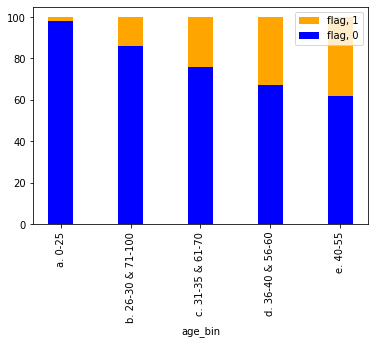

In [287]:
# 1. Graph of income and age groups
labels = cens_age1.index
width = 0.35
plt.bar(labels, (cens_age1/(cens_age0 + cens_age1) *100) + (cens_age0/(cens_age0 + cens_age1) *100), width, label = 'flag, 1', color = 'orange') # graphing bar for flag 1 result as a percentage
plt.bar(labels, (cens_age0/(cens_age0 + cens_age1) *100), width, label = 'flag, 0', color = 'blue') # graphing bar for flag 0 result as a percentage


plt.xticks(rotation = 90)
plt.xlabel('age_bin')
plt.legend()
plt.show()

In [288]:
# 2. Capital Gain/Loss by Flag( 0 or 1) Amount per bin
cens_capgainloss = census_data.groupby(['capital_gl_bin','y'])['capital_gl_bin'].count()
cens_capital_gl_0 = cens_capgainloss.loc[(slice(None),0)] # counting number of cases by capital_gl bin with 0 value
cens_capital_gl_1 = cens_capgainloss.loc[(slice(None),1)] # counting number of cases by capital_gl bin with 1 value
print(cens_capital_gl_0)
print(cens_capital_gl_1)

capital_gl_bin
a. = 0    34473
b. < 0     1138
c. > 0     1544
Name: capital_gl_bin, dtype: int64
capital_gl_bin
a. = 0    8052
b. < 0    1144
c. > 0    2491
Name: capital_gl_bin, dtype: int64


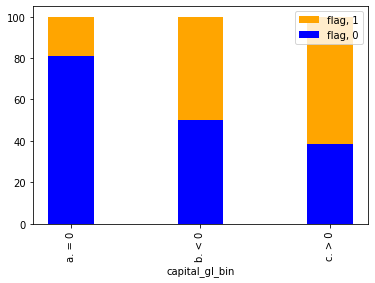

In [289]:
# 2. Graph of Capital Gain/Loss
labels = cens_capital_gl_1.index
width = 0.35
plt.bar(labels, (cens_capital_gl_1/(cens_capital_gl_0 + cens_capital_gl_1) *100) + (cens_capital_gl_0/(cens_capital_gl_0 + cens_capital_gl_1) *100), width, label = 'flag, 1', color = 'orange') # graphing bar for flag 1 result as a percentage
plt.bar(labels, (cens_capital_gl_0/(cens_capital_gl_0 + cens_capital_gl_1) *100), width, label = 'flag, 0', color = 'blue') # graphing bar for flag 0 result as a percentage


plt.xticks(rotation = 90)
plt.xlabel('capital_gl_bin')
plt.legend()
plt.show()

In [290]:
# 3. Education by Flag( 0 or 1) Amount per bin
cens_edu = census_data.groupby(['education_bin','y'])['education_bin'].count()
cens_edu_0 = cens_edu.loc[(slice(None),0)] # counting number of cases by education bin with 0 value
cens_edu_1 = cens_edu.loc[(slice(None),1)] # counting number of cases by education bin with 1 value
print(cens_edu_0)
print(cens_edu_1)

education_bin
a. Low           6042
b. Mid          24823
c. Bachelors     4712
d. Masters       1198
e. High           380
Name: education_bin, dtype: int64
education_bin
a. Low           366
b. Mid          5501
c. Bachelors    3313
d. Masters      1459
e. High         1048
Name: education_bin, dtype: int64


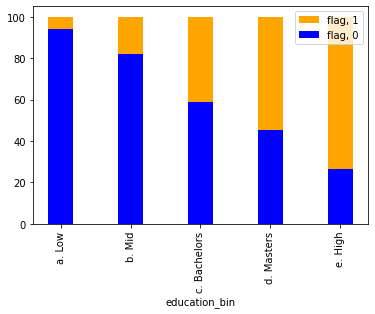

In [291]:
# 3. Graph of Education per Bin

labels = cens_edu_1.index
width = 0.35
plt.bar(labels, (cens_edu_1/(cens_edu_0 + cens_edu_1) *100) + (cens_edu_0/(cens_edu_0 + cens_edu_1) *100), width, label = 'flag, 1', color = 'orange') # graphing bar for flag 1 result as a percentage
plt.bar(labels, (cens_edu_0/(cens_edu_0 + cens_edu_1) *100), width, label = 'flag, 0', color = 'blue') # graphing bar for flag 0 result as a percentage


plt.xticks(rotation = 90)
plt.xlabel('education_bin')
plt.legend()
plt.show()

In [292]:
# 4. Hours per Week by Flag( 0 or 1) Amount Per Bin
cens_hpw = census_data.groupby(['hours_per_week_bin','y'])['hours_per_week_bin'].count()
cens_hpw_0 = cens_hpw.loc[(slice(None),0)] # counting number of cases by hours per week bin with 0 value
cens_hpw_1 = cens_hpw.loc[(slice(None),1)] # counting number of cases by hours per week bin with 1 value
print(cens_hpw_0)
print(cens_hpw_1)

hours_per_week_bin
a. 0-30              7325
b. 31-40            21220
c. 71-100             507
d. 41-50 & 61-70     5968
e. 51-60             2135
Name: hours_per_week_bin, dtype: int64
hours_per_week_bin
a. 0-30              526
b. 31-40            5419
c. 71-100            267
d. 41-50 & 61-70    3851
e. 51-60            1624
Name: hours_per_week_bin, dtype: int64


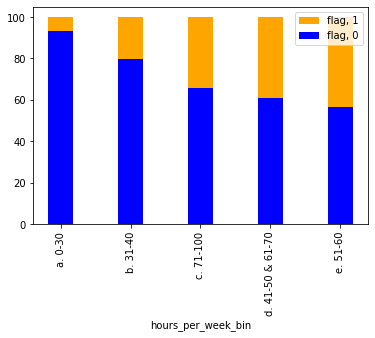

In [293]:
# 4. Graph of Hours Per Week Bin 
labels = cens_hpw_1.index
width = 0.35
plt.bar(labels, (cens_hpw_1/(cens_hpw_0 + cens_hpw_1) *100) + (cens_hpw_0/(cens_hpw_0 + cens_hpw_1) *100), width, label = 'flag, 1', color = 'orange') # graphing bar for flag 1 result as a percentage
plt.bar(labels, (cens_hpw_0/(cens_hpw_0 + cens_hpw_1) *100), width, label = 'flag, 0', color = 'blue') # graphing bar for flag 0 result as a percentage


plt.xticks(rotation = 90)
plt.xlabel('hours_per_week_bin')
plt.legend()
plt.show()

In [294]:
# 5. Marriage Status and Relationship by Flag( 0 or 1) Amount Per bin 

cens_msr = census_data.groupby(['msr_bin','y'])['msr_bin'].count()
cens_msr_0 = cens_msr.loc[(slice(None),0)] # counting number of cases by Marriage Status and Relationship bin with 0 value
cens_msr_1 = cens_msr.loc[(slice(None),1)] # counting number of cases by Marriage Status and Relationship bin with 1 value
print(cens_msr_0)
print(cens_msr_1)

msr_bin
a. Low     10751
b. Mid     14296
c. High    12108
Name: msr_bin, dtype: int64
msr_bin
a. Low      176
b. Mid     1572
c. High    9939
Name: msr_bin, dtype: int64


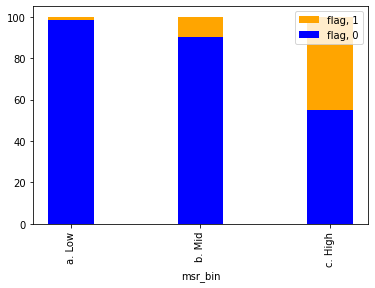

In [295]:
# 5. Graph of Marriage Status and Relationship Bin 

labels = cens_msr_1.index
width = 0.35
plt.bar(labels, (cens_msr_1/(cens_msr_0 + cens_msr_1) *100) + (cens_msr_0/(cens_msr_0 + cens_msr_1) *100), width, label = 'flag, 1', color = 'orange') # graphing bar for flag 1 result as a percentage
plt.bar(labels, (cens_msr_0/(cens_msr_0 + cens_msr_1) *100), width, label = 'flag, 0', color = 'blue') # graphing bar for flag 0 result as a percentage


plt.xticks(rotation = 90)
plt.xlabel('msr_bin')
plt.legend()
plt.show()

In [296]:
# 6. Occupation by Flag( 0 or 1) Amount Per bin 

cens_occ = census_data.groupby(['occupation_bin','y'])['occupation_bin'].count()
cens_occ_0 = cens_occ.loc[(slice(None),0)] # counting number of cases by Occupation bin with 0 value
cens_occ_1 = cens_occ.loc[(slice(None),1)] # counting number of cases by Occupation bin with 1 value
print(cens_occ_0)
print(cens_occ_1)

occupation_bin
a. Low            6892
b. Mid - Low     11364
c. Mid - Mid     10632
d. Mid - High     1701
e. High           6566
Name: occupation_bin, dtype: int64
occupation_bin
a. Low            345
b. Mid - Low     1583
c. Mid - Mid     3339
d. Mid - High     728
e. High          5692
Name: occupation_bin, dtype: int64


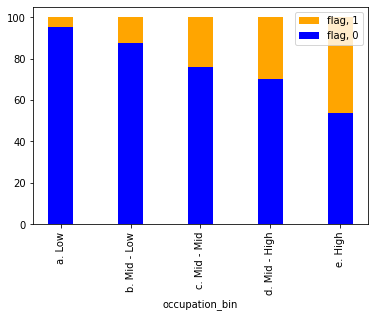

In [297]:
# 6. Graph of Occupation Bin 

labels = cens_occ_1.index
width = 0.35
plt.bar(labels, (cens_occ_1/(cens_occ_0 + cens_occ_1) *100) + (cens_occ_0/(cens_occ_0 + cens_occ_1) *100), width, label = 'flag, 1', color = 'orange') # graphing bar for flag 1 result as a percentage
plt.bar(labels, (cens_occ_0/(cens_occ_0 + cens_occ_1) *100), width, label = 'flag, 0', color = 'blue') # graphing bar for flag 0 result as a percentage


plt.xticks(rotation = 90)
plt.xlabel('occupation_bin')
plt.legend()
plt.show()

In [298]:
# 7. Race and Sex by Flag( 0 or 1) Amount Per bin 

cens_race = census_data.groupby(['race_sex_bin','y'])['race_sex_bin'].count()
cens_race_0 = cens_race.loc[(slice(None),0)] # counting number of cases by Race and Sex bin with 0 value
cens_race_1 = cens_race.loc[(slice(None),1)] # counting number of cases by Race and Sex bin with 1 value
print(cens_race_0)
print(cens_race_1)

race_sex_bin
a. Low      2490
b. Mid     14333
c. High    20332
Name: race_sex_bin, dtype: int64
race_sex_bin
a. Low      158
b. Mid     2124
c. High    9405
Name: race_sex_bin, dtype: int64


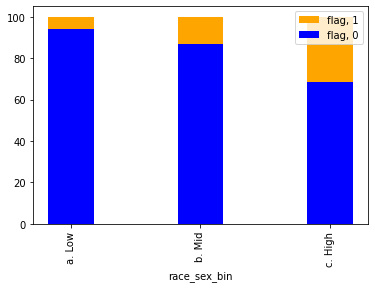

In [299]:
# 7. Graph of Race Sex Bin 

labels = cens_race_1.index
width = 0.35
plt.bar(labels, (cens_race_1/(cens_race_0 + cens_race_1) *100) + (cens_race_0/(cens_race_0 + cens_race_1) *100), width, label = 'flag, 1', color = 'orange') # graphing bar for flag 1 result as a percentage
plt.bar(labels, (cens_race_0/(cens_race_0 + cens_race_1) *100), width, label = 'flag, 0', color = 'blue') # graphing bar for flag 0 result as a percentage


plt.xticks(rotation = 90)
plt.xlabel('race_sex_bin')
plt.legend()
plt.show()

### Build Decision Tree Classifier Models:


In [300]:
# Creating test and train for x and y, using new_cens data
X_train = new_cens_train[['hours_per_week_bin', 'occupation_bin','msr_bin','capital_gl_bin', 'race_sex_bin','education_bin', 'workclass_bin']]
X_train.head() # X_train is keeping selected explanatory variables with the train flag
X_train.shape
X_test = new_cens_test[['hours_per_week_bin', 'occupation_bin','msr_bin','capital_gl_bin', 'race_sex_bin','education_bin', 'workclass_bin']]
X_test.head() # X_test is keeping selected explanatory variables with the test flag
X_test.shape
y_train = new_cens_train.y
y_train.head() # y_train is keeping the target column (y) with the train flag
y_train.shape
y_test = new_cens_test.y #y_test is keeping the target column with the test flag
y_test.shape
y_test.head()

32561    0
32562    0
32563    1
32564    1
32565    0
Name: y, dtype: int64

In [301]:
#Using decision tree classifier, package already imported above
%time #this times the output
choicetree = DecisionTreeClassifier(max_depth= 10, random_state = 101,
                                    max_features = None, min_samples_leaf = 15)
choicetree.fit(X_train,y_train) #fitting the training data to the model
y_pred = choicetree.predict(X_test) #creating an intitial prediction
y_pred[:5] # model has run successfully

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs


array([0, 0, 0, 1, 0])

### Visualize Your Decision Tree using GraphViz

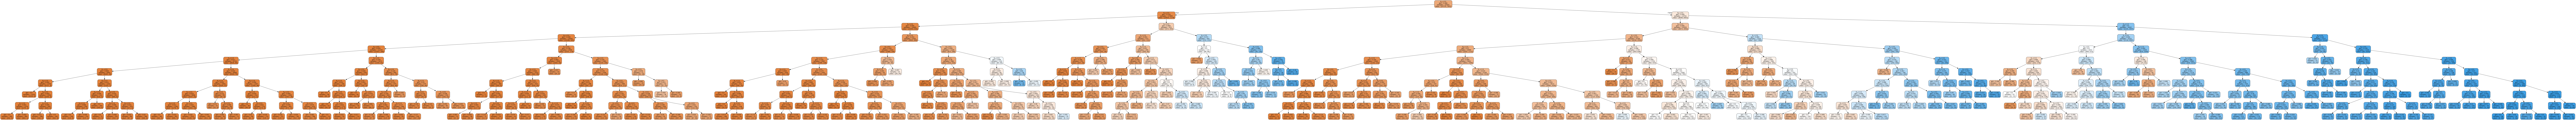

In [302]:
#Creating Initial Decision Tree using GraphViz
dot_data = StringIO()
export_graphviz(choicetree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) #this initial Decision Tree is very wide & hard to read, we may be able to pare it back when refining the model

### Evaluate Decision Tree Performance

##### Calculate and Display the following:
  1. Confusion Matrix (TP, TN, FP, FM ... etc.)
  2. Accuracy, Precision, Recall, F1 Score, AUC Value, ROC Curve (Graph)

In [303]:
# All metrics were imported in the import section of the notebook
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred= y_pred)
confusion_dict = {'tn': cm[0,0], 'fp': cm[0,1], 'fn': cm[1,0], 'tp': cm[1,1]} # turning the confusion matrix into a dictionary so the results are easier to read
accuracy = (confusion_dict['tn']+confusion_dict['tp']) /(confusion_dict['tn']+confusion_dict['tp']+confusion_dict['fn']+confusion_dict['fp'])
print(confusion_dict)
print(accuracy)

{'tn': 11604, 'fp': 831, 'fn': 1776, 'tp': 2070}
0.8398747005712179


In [304]:
# Accuracy, aka true scores / true score + false scores
accuracy_score(y_test, y_pred) # our baseline is ~84% accuracy score

0.8398747005712179

In [305]:
# Precision aka true positive / all positives
precision_score(y_test,y_pred) # our baseline precision is ~0.71

0.7135470527404343

In [306]:
# Recall aka true positive / true positive + false negative
recall_score(y_test, y_pred= y_pred)
# our baseline is ~0.54, so not much better than random guessing

0.5382215288611545

In [307]:
# F1 Score, f1_score is 2(precision * recall)/ (precision * recall)
f1_score(y_test, y_pred)
# our baseline is ~0.61

0.6136060471320587

In [308]:
# AUC Value
roc_auc_score(y_test, y_pred)
# the baseline value is ~ 0.74, better than the random guess value of ~0.5

0.7356970129227365

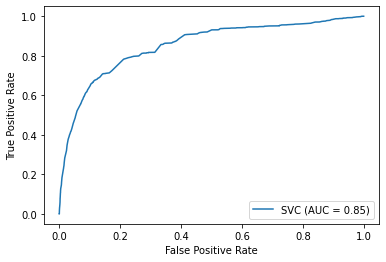

In [309]:
# ROC Curve
roc_curve(y_test, y_pred)
classifier = svm.SVC(random_state= 0) # this line and the one below are creating the classifier for the ROC curve
classifier.fit(X_train, y_train)
plot_roc_curve(classifier,X_test,y_test)
plt.show()

## Tune Decision Tree Performance

##### Vary the following 4 hyperparameters manually:
  1. Split Criteria
  2. Minimum Sample Split
  3. Minimum Sample Leaf
  4. Maximum Depth

### 1. Split Criteria

In [310]:
# Entropy Default measures
%time
choicetree = DecisionTreeClassifier(criterion = 'entropy', max_depth= 10, random_state = 101,
                                    max_features = None, min_samples_leaf = 15, min_samples_split = 2)
choicetree.fit(X_train,y_train) #fitting the training data to the model
y_pred = choicetree.predict(X_test)

# Printing measures
outputdict = {'accuracy ': accuracy_score(y_test, y_pred),
  'recall ':recall_score(y_test, y_pred= y_pred),
  'precision ':precision_score(y_test,y_pred),
  'f1' :f1_score(y_test, y_pred)} # creating a dictionary so the outputs are all on one line
print(outputdict) # with default values

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
{'accuracy ': 0.8398747005712179, 'recall ': 0.5382215288611545, 'precision ': 0.7135470527404343, 'f1': 0.6136060471320587}


In [311]:
# GINI with other default measures
%time
choicetree = DecisionTreeClassifier(criterion = 'gini', max_depth= 10, random_state = 101,
                                    max_features = None, min_samples_leaf = 15, min_samples_split = 2)
choicetree.fit(X_train,y_train) #fitting the training data to the model
y_pred = choicetree.predict(X_test)

# Printing measures
outputdict = {'accuracy ': accuracy_score(y_test, y_pred),
  'recall ':recall_score(y_test, y_pred= y_pred),
  'precision ':precision_score(y_test,y_pred),
  'f1' :f1_score(y_test, y_pred)}
print(outputdict) # the metrics between gini and entropy are the same if all values are the default values

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
{'accuracy ': 0.8398747005712179, 'recall ': 0.5382215288611545, 'precision ': 0.7135470527404343, 'f1': 0.6136060471320587}


### 2. Minimum Sample Split

In [312]:
# Using entropy and changing the min sample split from 2 to 1500, this means 1500 records must be available to split
%time
choicetree = DecisionTreeClassifier(criterion = 'entropy', max_depth= 10, random_state = 101,
                                    max_features = None, min_samples_leaf = 15, min_samples_split = 1500)
choicetree.fit(X_train,y_train) #fitting the training data to the model
y_pred = choicetree.predict(X_test)

# Printing measures
outputdict = {'accuracy ': accuracy_score(y_test, y_pred),
  'recall ':recall_score(y_test, y_pred= y_pred),
  'precision ':precision_score(y_test,y_pred),
  'f1' :f1_score(y_test, y_pred)} # creating a dictionary so the outputs are all on one line
print(outputdict) # accuracy, precision, and f1 are less than the default for entropy, but the recall has increased

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
{'accuracy ': 0.8369264787175235, 'recall ': 0.5540821632865315, 'precision ': 0.6939107782481276, 'f1': 0.6161630764782421}


In [313]:
# Using GINI and changing the min sample split from 2 to 1500, this means 1500 records must be available to split, with 16,000 test records I think this is a reasonable amount
%time
choicetree = DecisionTreeClassifier(criterion = 'gini', max_depth= 10, random_state = 101,
                                    max_features = None, min_samples_leaf = 15, min_samples_split = 1500)
choicetree.fit(X_train,y_train) #fitting the training data to the model
y_pred = choicetree.predict(X_test)

# Printing measures
outputdict = {'accuracy ': accuracy_score(y_test, y_pred),
  'recall ':recall_score(y_test, y_pred= y_pred),
  'precision ':precision_score(y_test,y_pred),
  'f1' :f1_score(y_test, y_pred)} # creating a dictionary so the outputs are all on one line
print(outputdict) #all four metrics have decreased compared to gini with default values

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
{'accuracy ': 0.8347153123272526, 'recall ': 0.5273010920436817, 'precision ': 0.6990692864529473, 'f1': 0.6011560693641619}


### 3. Minimum Sample Leaf

In [314]:
# Using entropy and changing the min sample leaf from 15 to 500, this means 500 records must be in each split leaf
# 500 records is reasonable because the test data is 16,000 records
%time
choicetree = DecisionTreeClassifier(criterion = 'entropy', max_depth= 10, random_state = 101,
                                    max_features = None, min_samples_leaf = 500, min_samples_split = 2)
choicetree.fit(X_train,y_train) #fitting the training data to the model
y_pred = choicetree.predict(X_test)

# Printing measures
outputdict = {'accuracy ': accuracy_score(y_test, y_pred),
  'recall ':recall_score(y_test, y_pred= y_pred),
  'precision ':precision_score(y_test,y_pred),
  'f1' :f1_score(y_test, y_pred)} # creating a dictionary so the outputs are all on one line
print(outputdict)  #compared to the default entropy the accuracy and precision are lower, but recall and f1 are higher

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
{'accuracy ': 0.832626988514219, 'recall ': 0.6027041081643266, 'precision ': 0.6594594594594595, 'f1': 0.6298057329167233}


In [315]:
# Using gini and changing the min sample leaf from 15 to 500, this means 500 records must be in each split leaf
# 500 records is reasonable because the test data is 16,000 records
%time
choicetree = DecisionTreeClassifier(criterion = 'gini', max_depth= 10, random_state = 101,
                                    max_features = None, min_samples_leaf = 500, min_samples_split = 2)
choicetree.fit(X_train,y_train) #fitting the training data to the model
y_pred = choicetree.predict(X_test)

# Printing measures
outputdict = {'accuracy ': accuracy_score(y_test, y_pred),
  'recall ':recall_score(y_test, y_pred= y_pred),
  'precision ':precision_score(y_test,y_pred),
  'f1' :f1_score(y_test, y_pred)} # creating a dictionary so the outputs are all on one line
print(outputdict) # compared to default gini the accuracy and precision are lower, but the recall and f1 are higher

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs
{'accuracy ': 0.8328726736686936, 'recall ': 0.5686427457098284, 'precision ': 0.6731301939058172, 'f1': 0.6164904862579281}


### 4. Maximum Depth

In [316]:
# Entropy with max depth changed from 10 to 5, max depth of tree is now 5
%time
choicetree = DecisionTreeClassifier(criterion = 'entropy', max_depth= 5, random_state = 101,
                                    max_features = None, min_samples_leaf = 15, min_samples_split = 2)
choicetree.fit(X_train,y_train) #fitting the training data to the model
y_pred = choicetree.predict(X_test)

# Printing measures
outputdict = {'accuracy ': accuracy_score(y_test, y_pred),
  'recall ':recall_score(y_test, y_pred= y_pred),
  'precision ':precision_score(y_test,y_pred),
  'f1' :f1_score(y_test, y_pred)} # creating a dictionary so the outputs are all on one line
print(outputdict) # Compared to the default entropy the precision is higher, but accuracy, recall, and f1 score are all lower

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
{'accuracy ': 0.8364351084085744, 'recall ': 0.4869994799791992, 'precision ': 0.7307842372220055, 'f1': 0.5844905601497893}


In [317]:
# Gini with max depth changed from 10 to 5, max depth of tree is now 5
%time
choicetree = DecisionTreeClassifier(criterion = 'gini', max_depth= 5, random_state = 101,
                                    max_features = None, min_samples_leaf = 15, min_samples_split = 2)
choicetree.fit(X_train,y_train) #fitting the training data to the model
y_pred = choicetree.predict(X_test)

# Printing measures
outputdict = {'accuracy ': accuracy_score(y_test, y_pred),
  'recall ':recall_score(y_test, y_pred= y_pred),
  'precision ':precision_score(y_test,y_pred),
  'f1' :f1_score(y_test, y_pred)} # creating a dictionary so the outputs are all on one line
print(outputdict) # Compared to the default gini the precision score is higher, but the recall, accuracy, and f1 score are lower

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs
{'accuracy ': 0.8364351084085744, 'recall ': 0.4869994799791992, 'precision ': 0.7307842372220055, 'f1': 0.5844905601497893}


### Conclusion

In [318]:
# Best model is the one with the highest f1 score
#Questions are answered in the word document

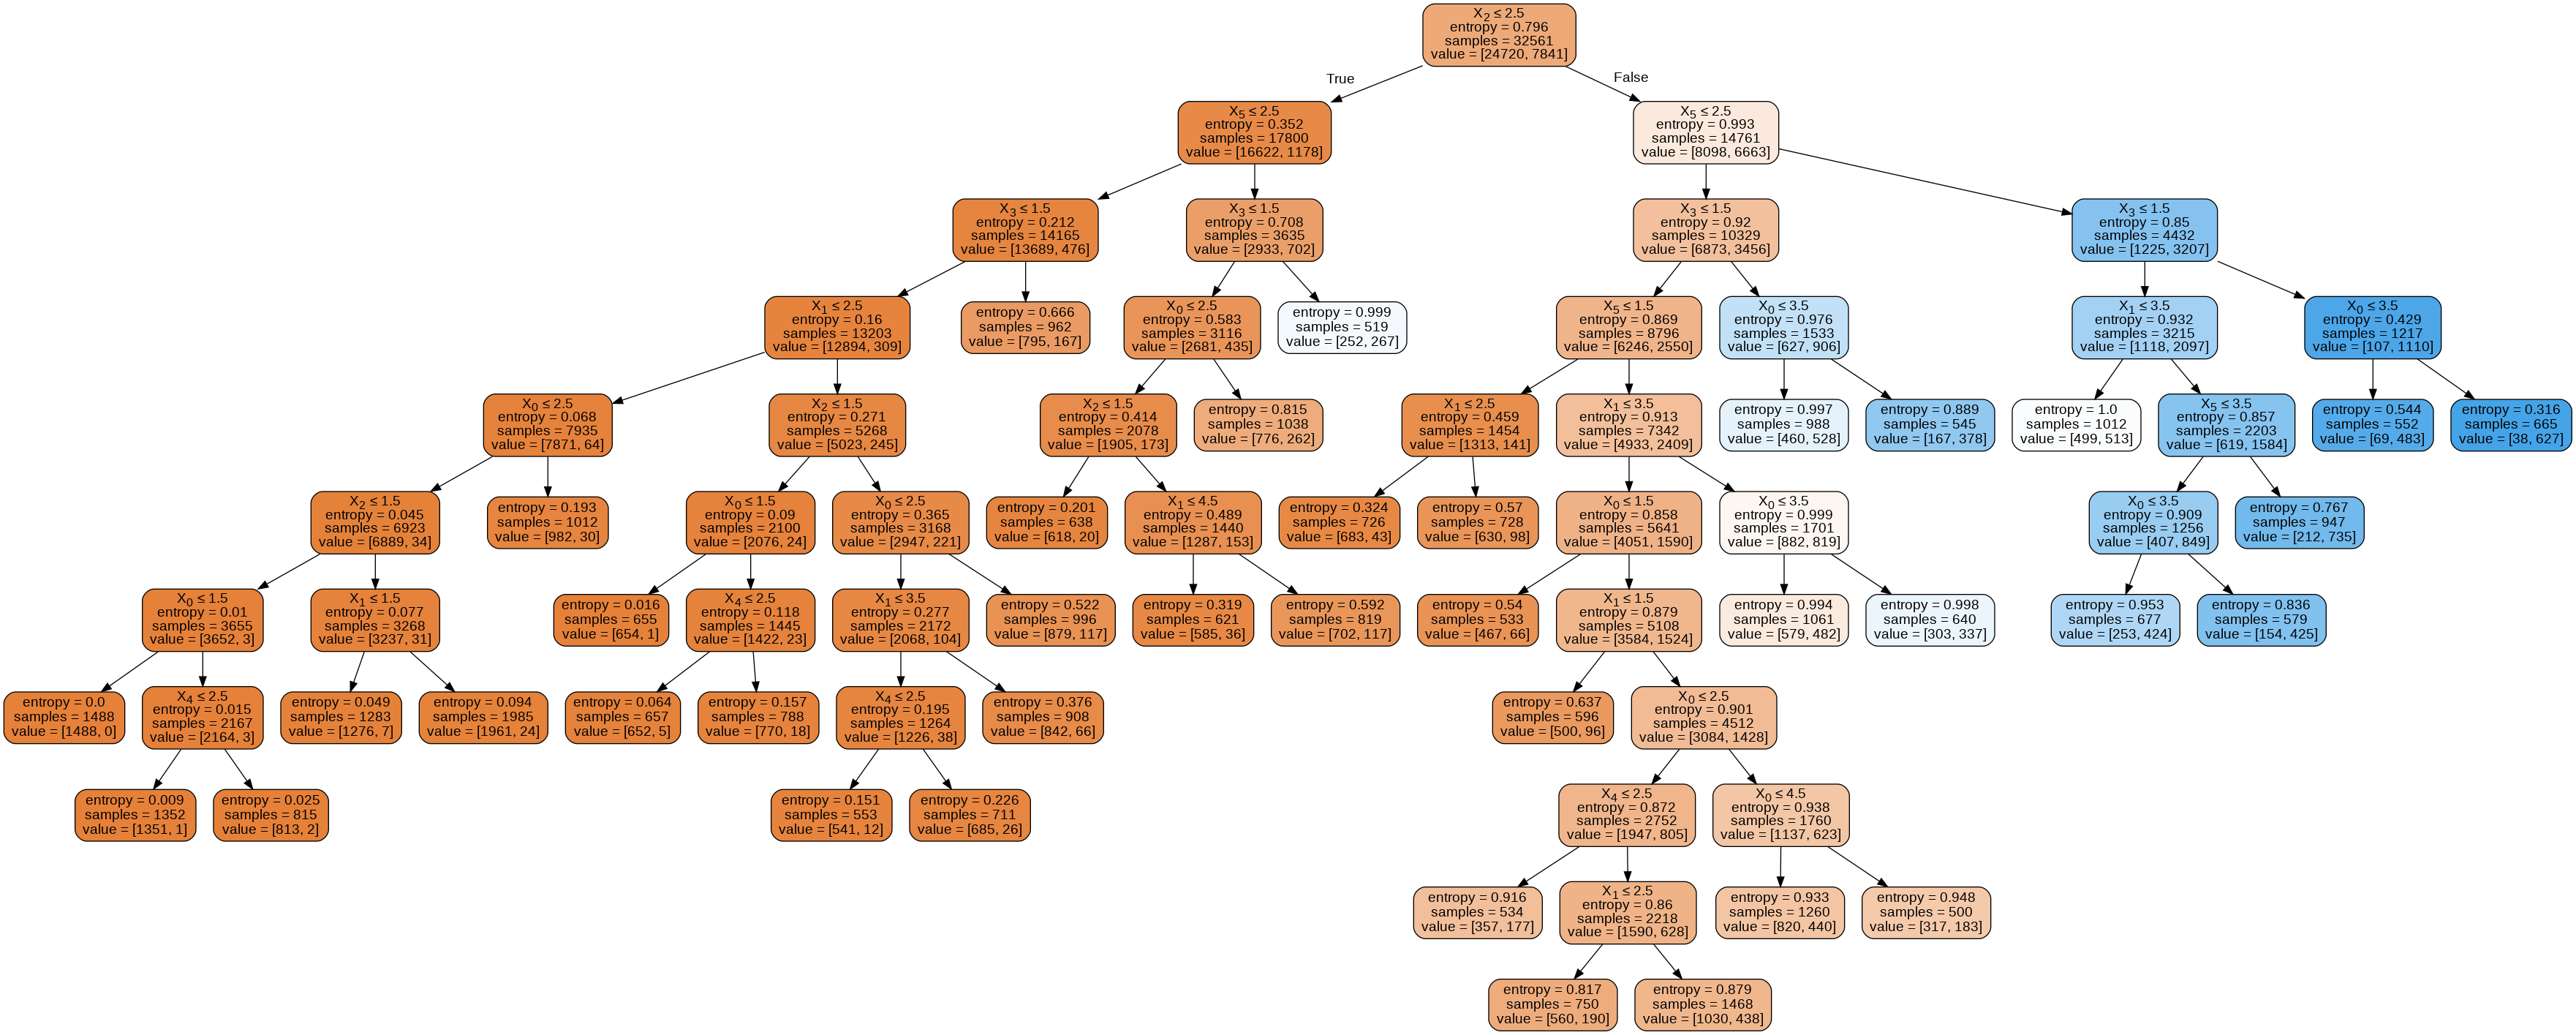

In [319]:
# Graphing the best tree with GraphViz for question 8.3

#using code that made the best tree
choicetree = DecisionTreeClassifier(criterion = 'entropy', max_depth= 10, random_state = 101,
                                    max_features = None, min_samples_leaf = 500, min_samples_split = 2)
choicetree.fit(X_train,y_train) #fitting the training data to the model
y_pred = choicetree.predict(X_test)

#Creating Best Decision Tree using GraphViz
dot_data = StringIO()
export_graphviz(choicetree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) #this Decision Tree is easier to read

### Automation of Performance Tuning



In [320]:
# Automating the above section of hyperparameter tuning performance and displaying the results as a table
# read in hyperparameter tuning csv (param_tune) in the data section
param_tune.head(1)

Split Criteria (Entropy or Gini)  Minimum Sample Split  ...  Precision  F1 Score
0                          Entropy                     2  ...        NaN       NaN

[1 rows x 8 columns]

In [321]:
# automating the tuning

def automator():
  for index, r in param_tune.iterrows(): #iterates through the rows of param_tune
    if r['Split Criteria (Entropy or Gini)'] == 'Entropy': # selecting for entropy
      model = DecisionTreeClassifier( criterion= 'entropy', random_state= 101, max_features= None, min_samples_split= r['Minimum Sample Split'],
                                     min_samples_leaf= r['Minimum Sample Leaf'], max_depth= r['Maximum Depth']) #the loop will put row values from table where params have r[]
      model.fit(X_train, y_train) #fitting model to training data
      y_pred_auto = model.predict(X_test) #predicting
      accuracy = accuracy_score(y_test, y_pred_auto)
      recall = recall_score(y_test, y_pred= y_pred_auto) #these rows calculate the metrics
      precision = precision_score(y_test,y_pred_auto)
      f1 = f1_score(y_test, y_pred_auto)
      param_tune.at[index, 'Accuracy'] = accuracy
      param_tune.at[index, 'Recall'] = recall 
      param_tune.at[index, 'Precision'] = precision # these rows are adding the outputs to the table
      param_tune.at[index, 'F1 Score'] = f1
    elif r['Split Criteria (Entropy or Gini)'] == 'Gini Impurity': #selecting for 'gini' rows
      model = DecisionTreeClassifier( criterion= 'gini', random_state= 101, max_features= None, min_samples_split= r['Minimum Sample Split'],
                                     min_samples_leaf= r['Minimum Sample Leaf'], max_depth= r['Maximum Depth']) #the loop will put row values from table where params have r[]
      model.fit(X_train, y_train) #fitting to training data
      y_pred_auto = model.predict(X_test) #making a prediction
      accuracy = accuracy_score(y_test, y_pred_auto)
      recall = recall_score(y_test, y_pred= y_pred_auto) # these rows calculate the metrics
      precision = precision_score(y_test,y_pred_auto)
      f1 = f1_score(y_test, y_pred_auto)
      param_tune.at[index, 'Accuracy']= accuracy
      param_tune.at[index, 'Recall'] = recall # these rows are adding the outputs to the table
      param_tune.at[index, 'Precision'] = precision
      param_tune.at[index, 'F1 Score'] = f1  
automator()
print(param_tune) #table now has all of the output values added, they are the same values as those in the manual able, so we know it autoomated successfully

  Split Criteria (Entropy or Gini)  Minimum Sample Split  ...  Precision  F1 Score
0                          Entropy                     2  ...   0.713547  0.613606
1                          Entropy                     2  ...   0.730784  0.584491
2                          Entropy                     2  ...   0.659459  0.629806
3                          Entropy                  1500  ...   0.693911  0.616163
4                    Gini Impurity                     2  ...   0.713547  0.613606
5                    Gini Impurity                     2  ...   0.730784  0.584491
6                    Gini Impurity                     2  ...   0.673130  0.616490
7                    Gini Impurity                  1500  ...   0.699069  0.601156

[8 rows x 8 columns]


### Prediction using your 'Trained' Decision Tree Model
Use the best tree model to predict the Income Category (y) of a sample with the following info values in () are the category code:

Hours Worked Per Week = 48 (4)

Occupation Category =Mid-Low (2)

Marriage Status and Relationships = High (3)

Capital Gain = Yes (3)

Race-Sex Group = Mid (2)

Number of Years of Education = 12 (2)

Education Category = High (5)

Work Class = Income (2)

Age = 58 (4)

---



In [322]:
# Trying to predict the income category of a sample with the best tree I had (highest f1 score I got)

#Adding choice tree information
choicetree = DecisionTreeClassifier(criterion = 'entropy', max_depth= 10, random_state = 101,
                                    max_features = None, min_samples_leaf = 500, min_samples_split = 2)
choicetree.fit(X_train,y_train) #fitting the training data to the model
y_pred3 = choicetree.predict([[4,2,3,3,2,5,4]]) # the model excludes number of years of education and work class, since they were not asked for in the prior models
print(y_pred3) # The model predicts that this sample person will have an income above $50K 
y_pred3_prob = choicetree.predict_proba([[4,2,3,3,2,5,4]])
print(y_pred3_prob) # the model has a 94% probability of this sample person having an income above $50K
# the model's accuracy is ~83.3% overall

[1]
[[0.05714286 0.94285714]]
